# 1-Data Pre-processing 

In [3]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [4]:
# Importing data
df = pd.read_csv("../data/train.csv", sep = r',', skipinitialspace = True)

df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

### Renaming columns

In [6]:
#change columns name
df.columns= df.columns.str.replace(" ","_").str.lower()
df.head()


,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


### Change column values

In [7]:
# Filter all the rows that have duration value less than "30"
df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in_min/ms, Length: 2580, dtype: float64

In [8]:
condition = df['duration_in_min/ms'] < 30 

# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in_min/ms'] = df.loc[condition,'duration_in_min/ms']*60000

In [9]:
df.rename(columns={"duration_in_min/ms": "duration_in_ms"})

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


## Checking for duplicates

In [10]:
df.duplicated().sum()

3

## Columns with NaN values
- Popularity
- key                 
- instrumentalness

In [11]:
sns.distplot(x = df['popularity'])

KeyError: 'Popularity'

/home/ysot/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

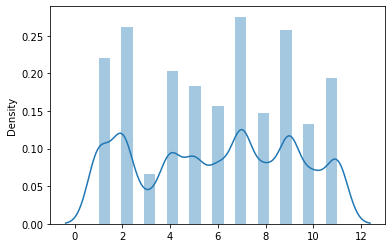

In [ ]:
sns.distplot(x = df['key'])

/home/ysot/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

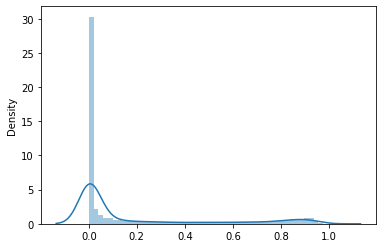

In [ ]:
sns.distplot(x = df['instrumentalness'])

### Imputing NaN values
- Popularity is normally distributed, so we'll use the mean to fill NA values. 
- instrumentalness seems to be positively skewed, so the median would be a good option to fill NA values

In [12]:
df['popularity'].fillna(df['popularity'].mean(), inplace=True)
df['key'].fillna(df['key'].mean(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         17996 non-null  object 
 1   track_name          17996 non-null  object 
 2   popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in_min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  clas

In [14]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.174372,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.358233e+05,3.924039,6.695821
std,17.218436,0.166268,0.235373,3.725649,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,8.567503e+04,0.361618,3.206073
min,1.000000,0.059600,0.000020,-1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,2.332000e+04,1.000000,0.000000
25%,33.000000,0.432000,0.509000,2.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.876497e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,5.000000,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.200000e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.630822e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.793160e+06,5.000000,10.000000


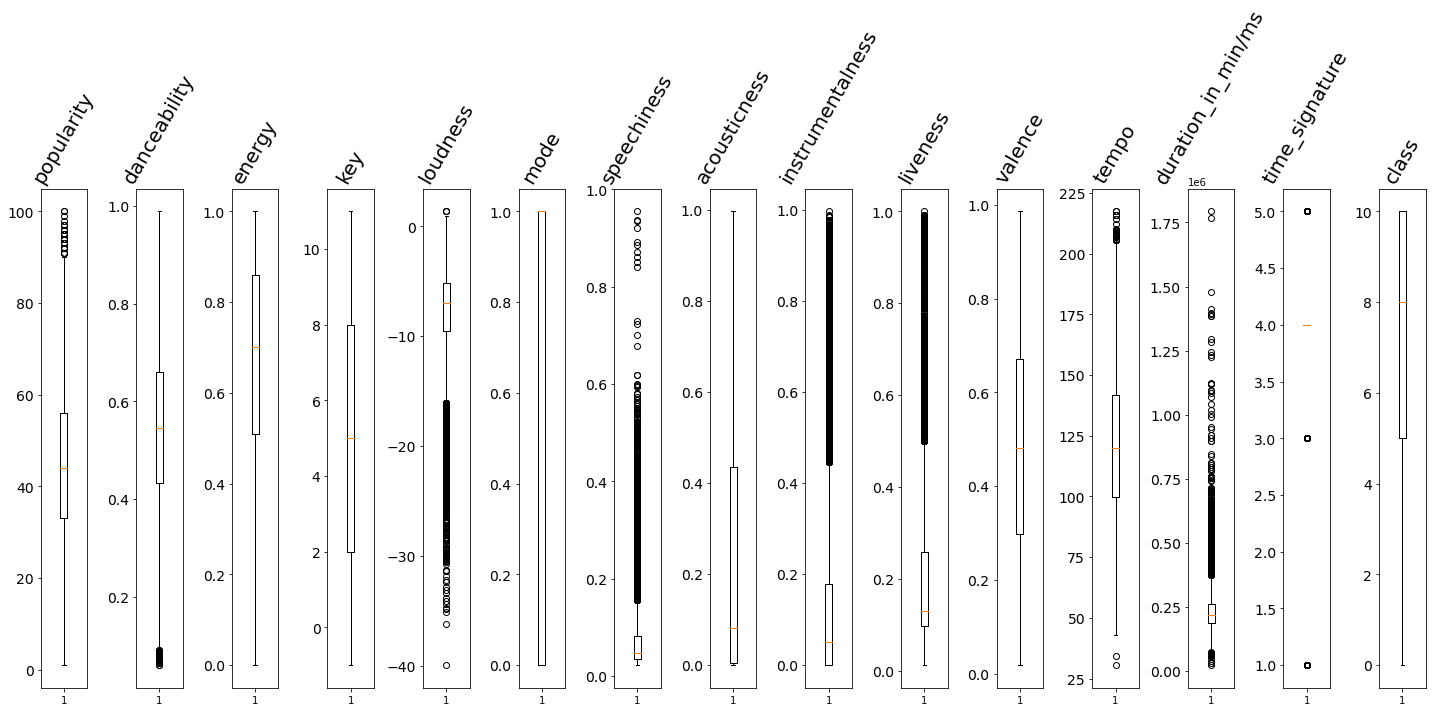

In [15]:
df_box = df.select_dtypes([int,float])
fig, axs = plt.subplots(1, len(df_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i])
    ax.set_title(df_box.columns[i], fontsize=20, rotation=60)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()


<AxesSubplot:>

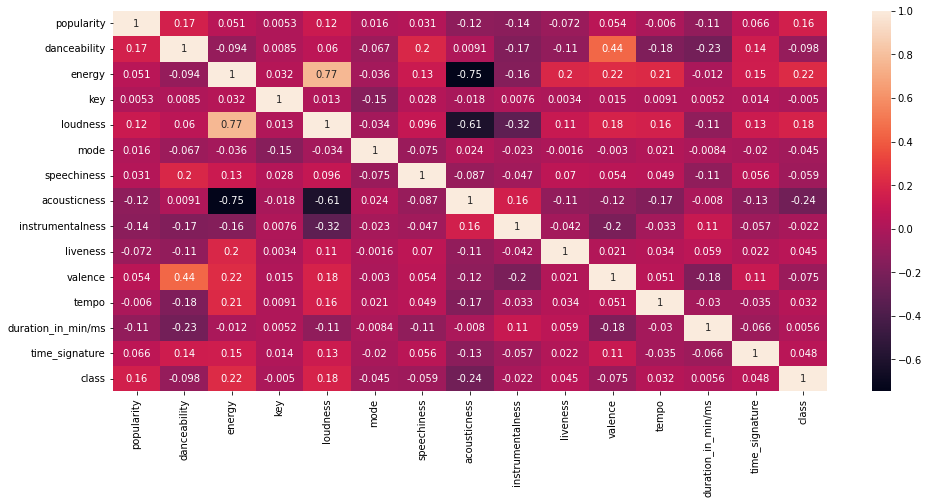

In [16]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

In [19]:
corr = df.corr()
corr.Class.sort_values(ascending=False)

SyntaxError: invalid syntax (34633983.py, line 2)

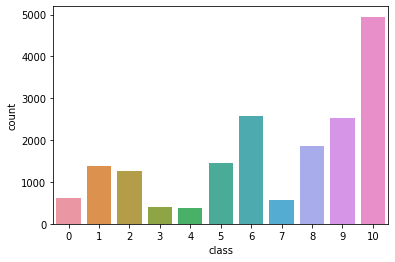

In [18]:
# Number of classes
sns.countplot(data = df, x= df["class"])
plt.show()

### Categorical data encoding

In [20]:
columns = ["artist_name","track_name"]
enc = LabelEncoder()
for col in columns:
    df[col] = enc.fit_transform(df[col])

In [21]:
df[["artist_name","track_name"]]

,artist_name,track_name
0,1182,11406
1,1092,4988
2,7899,8144
3,1987,6753
4,6283,8167
...,...,...
17991,3042,3796
17992,5122,476
17993,7032,8769
17994,797,9743
